In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors 
pio.templates.default = "plotly_white"
import re
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\naveen\OneDrive\Desktop\New folder\BlackFriday.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
c = df.copy()

In [5]:
c

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [6]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
c['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [8]:
c['Product_Category_2'].fillna('0',inplace=True)

In [9]:
c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,NaN,7969


In [10]:
c['Product_Category_3'].fillna('0',inplace=True)

In [11]:
c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [12]:
c['Product_Category_3']=c['Product_Category_3'].astype('int')

In [13]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  object
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 49.2+ MB


In [14]:
c['Product_Category_2'].unique()

array(['0', 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0, 12.0,
       9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

In [15]:
c['Product_Category_2']=c['Product_Category_2'].astype('int')

In [16]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 49.2+ MB


In [17]:
c['Stay_In_Current_City_Years'] = c['Stay_In_Current_City_Years'].str.replace('+','')

In [18]:
c['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [19]:
c['Stay_In_Current_City_Years']=c['Stay_In_Current_City_Years'].astype('int')

In [20]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  int64 
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 49.2+ MB


In [21]:
c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969


In [22]:
c.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,1.859458,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,1.289828,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,1.000000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,2.000000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,3.000000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


# `DATA VISUALIZATION`

In [23]:
df1=c.groupby(['Age'])['Purchase'].sum().reset_index()
df1

,Age,Purchase
0,0-17,132659006
1,18-25,901669280
2,26-35,1999749106
3,36-45,1010649565
4,46-50,413418223
5,51-55,361908356
6,55+,197614842


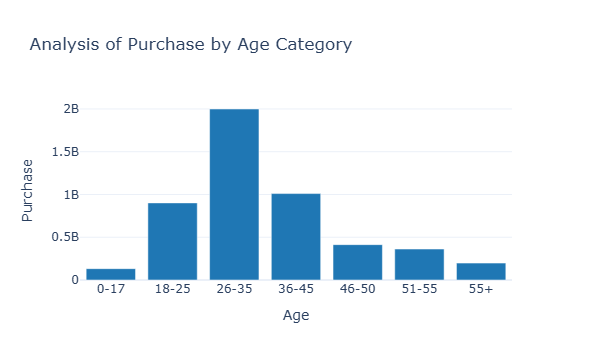

In [39]:
fig = px.bar(
    df1,
    x='Age',
    y='Purchase',
    title='Analysis of Purchase by Age Category',
    color_discrete_sequence=px.colors.qualitative.D3  
)
fig.show()


In [ ]:
df2=c.groupby('Gender').agg({'Product_Category_1':'sum','Product_Category_2':'sum','Product_Category_3':'sum'}).reset_index()
color_palette=colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=df2['Gender'],y=df2['Product_Category_1'],name='Product_Category_1',marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=df2['Gender'],y=df2['Product_Category_2'],name='Product_Category_2',marker_color=color_palette[1]))
fig.add_trace(go.Bar(x=df2['Gender'],y=df2['Product_Category_3'],name='Product_Category_3',marker_color =color_palette[2]))
fig.update_layout(title='Analaysis products category choose by Gender',xaxis_title='GENDER',yaxis_title='PRODUCTS CATEGORY')
fig.show()

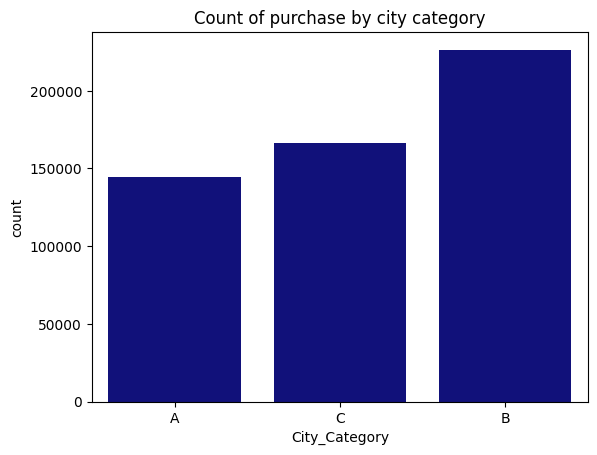

In [25]:
sns.countplot(data=c,x='City_Category',color='darkblue')
plt.title('Count of purchase by city category')
plt.show()

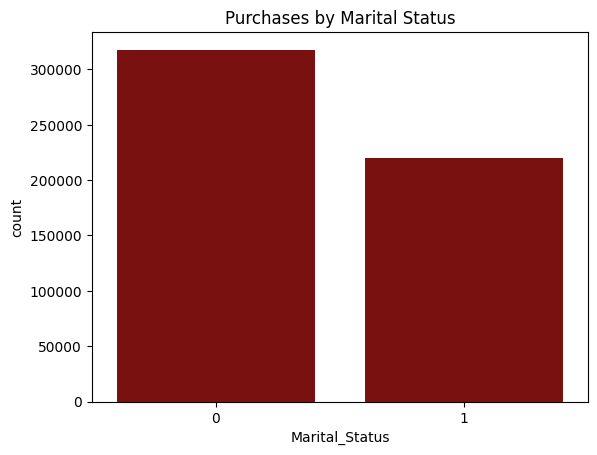

In [26]:
sns.countplot(data=c,x='Marital_Status',color='darkred')
plt.title('Purchases by Marital Status')
plt.show()

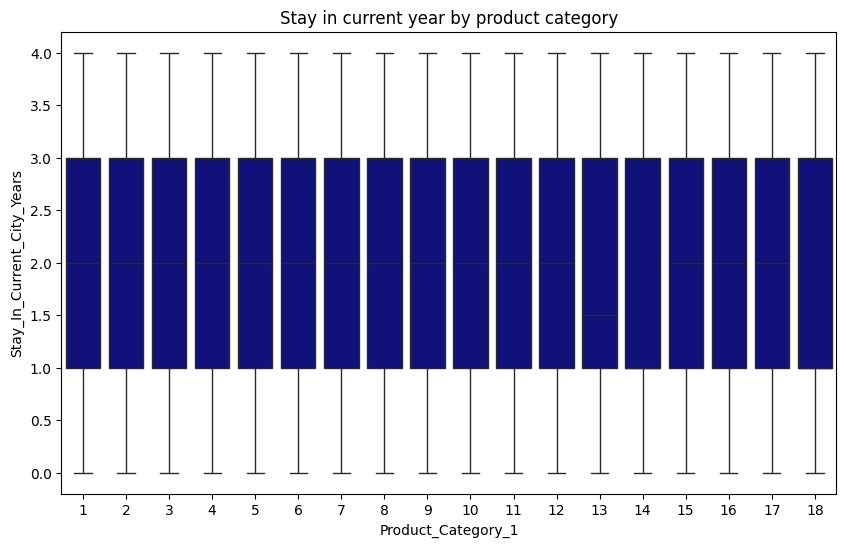

In [27]:
plt.figure(figsize=(10,6))

sns.boxplot(data=c,x='Product_Category_1',y='Stay_In_Current_City_Years',color='darkblue')
plt.title('Stay in current year by product category')
plt.show()




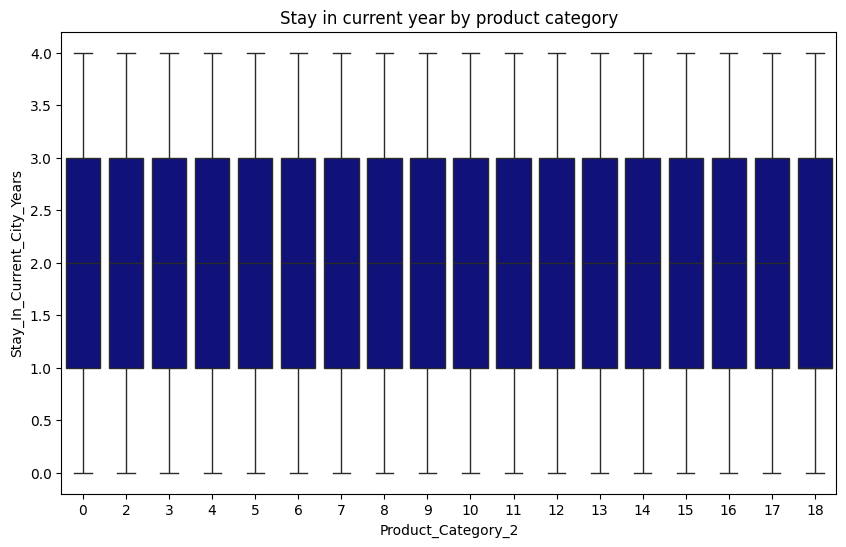

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=c,x='Product_Category_2',y='Stay_In_Current_City_Years',color='darkblue')
plt.title('Stay in current year by product category')
plt.show()

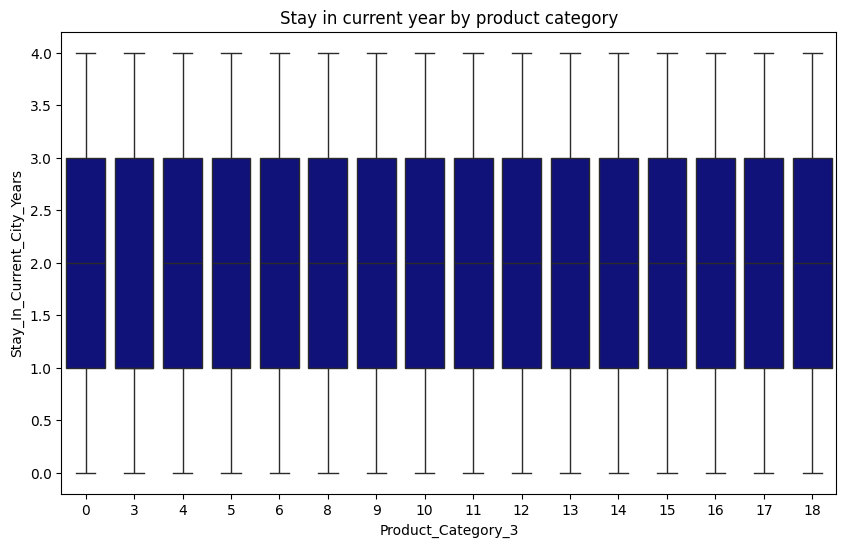

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=c,x='Product_Category_3',y='Stay_In_Current_City_Years',color='darkblue')
plt.title('Stay in current year by product category')
plt.show()

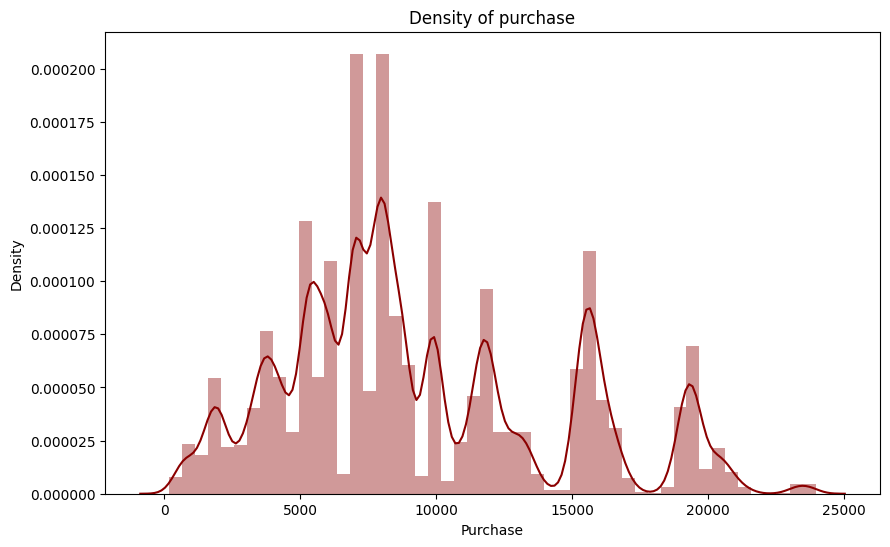

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(c['Purchase'],color='darkred')
plt.title('Density of purchase')
plt.show()


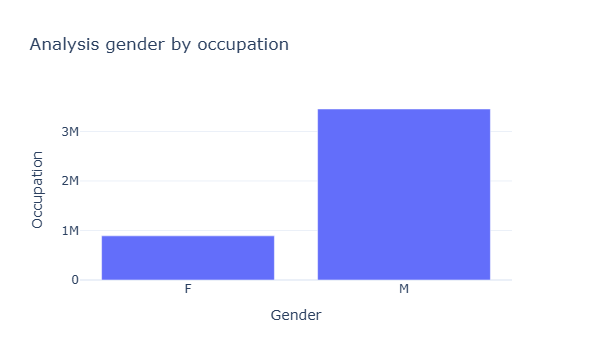

In [31]:
occupation_by_genders=c.groupby(['Gender'])['Occupation'].sum().reset_index()
fig=px.bar(occupation_by_genders,x='Gender',y='Occupation',title='Analysis gender by occupation')
fig.show()

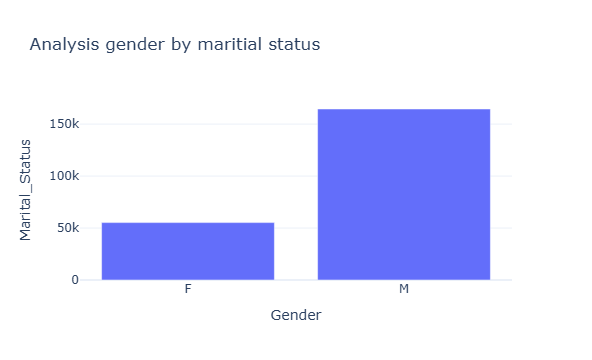

In [32]:
mg=c.groupby(['Gender'])['Marital_Status'].sum().reset_index()
fig=px.bar(mg,x='Gender',y='Marital_Status',title='Analysis gender by maritial status' )
fig.show()

In [ ]:
c.head()

In [34]:
gender=c['Gender'].value_counts().reset_index()


In [35]:
gender.columns=['Gender','count']

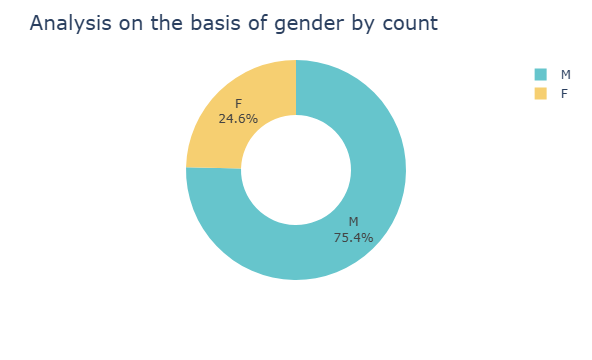

In [36]:
fig=px.pie(gender,values='count',names='Gender',hole=.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Analysis on the basis of gender by count',title_font=dict(size=(20)))
fig.show()